# An analytics approach to Global Terrorism

## Telling	a Story with Data 
### Team F08

Sherin Varghese - savarghe

Jose Eduardo Oros - joroscha


Terrorism continues to affect the life of millions of people all across the world. During the last months in the US, there has been an ongoing heated debate on what is the best way to approach this problem, and what policies should be implemented. Certain groups have been labeled, and polemic decisions have been taken. We considered that the best way to have a meaningful opinion on the subject is to look at the data. 

This analysis will focus on answering the following general questions:

1. How has the number of attacks and victims of terrorism evolved through time?
2. Which groups are responsible for the most deadly attacks?

Then, we will focus our attention on two terrorist groups in South and Central America for answering the following questions:

1. What is the period of time of activity of both groups?
2. How does each particular group spread geograhically in their respective regions?
2. What was their particular modus operandi and motives?
3. What were the main reasons for the groups' disappearance?

To perform our analysis, we used data from the The Global Terrorism Database (GTD), an open-source database including information on terrorist events around the world from 1970 through 2015. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and includes more than 150,000 cases. To discover more interesting insights, we matched keywords from our data with data from Wikipedia's Years pages (eg. 1978, 1992 etc), using Wptools, a Python library that uses Wikipedia API.

Our work is presented with visualizations using both Tableau and matplotlib. Tableau visualizations were posted to Tableau's online public server and were linked to the notebook using the embed code. Two animated visualizations were added, for the purpose of analyzing the geographical spread of these groups.

* Important: We included the library wptools for our analysis. This library uses the Wikipedia API to query information from the webpage. It is required to install the library as follows:

    pip install wptools

In [1]:
#import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#import the dataset, and perform pre processing
ter_df = pd.read_csv('globalt.csv',encoding='latin-1',dtype='unicode')
ter_df[['doubtterr']] = ter_df[['doubtterr']].astype(float)
ter_df[['iyear']] = ter_df[['iyear']].astype(int)

First, we want to keep the columns that will be useful for our analysis. We will filter out the events that are labeled as ambiguous attacks, by removing the records with doubtterr = 0.

In [3]:
ter_filtered= ter_df[(ter_df['doubtterr'] == 0) &  (ter_df['iyear'] >= 1970)]
ter_filtered = ter_filtered[['eventid','iyear', 'imonth', 'iday','country', 'country_txt', 'region', 'region_txt',
              'provstate','city', 'longitude','latitude', 'location','crit1', 'crit2', 'crit3', 'multiple',
              'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
             'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'gname',
             'motive', 'nperps', 'nperpcap', 'claimed','claimmode', 'claimmode_txt', 'weaptype1', 'weaptype1_txt',
             'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nkillter', 'nwound', 'property', 'property', 'propextent',
              'propextent_txt', 'propvalue', 'ishostkid', 'nhostkid','divert', 'ransom', 'ransompaid', 'hostkidoutcome',
              'hostkidoutcome_txt',  'addnotes', 'INT_LOG', 'related']]




We have to perform some data cleaning to remove unwanted characters in some of the columns.

In [4]:
ter_filtered.loc[:,list(ter_filtered.columns)] = ter_filtered[list(ter_filtered.columns)].replace(['.']*len(ter_filtered.columns), ['Unknown']*len(ter_filtered.columns))

We can analyze how many values and what categories we have for each feature in our dataset, to help us select what features we should keep. Eg: We will look at the feature 'multiple' to check how it's values are distributed.

In [5]:
ter_filtered.groupby('multiple').size().sort_values(ascending = False)

multiple
0    101153
1     17605
dtype: int64

Now, lets look at some interesting aspects of our data. The number of terrorist attacks registered in our dataset are:

In [6]:
len(ter_filtered)

118758

We have data from 1970 to 2015

In [7]:
print('Minimum value for year:',min(ter_filtered['iyear']))
print('Maximum value for year:',max(ter_filtered['iyear']))

Minimum value for year: 1970
Maximum value for year: 2015


## Number of Attacks

Lets see how many attacks we have registered in our data set for the first few years:

In [8]:
ter_filtered.groupby('iyear').size().head()

iyear
1970    489
1971    323
1972    313
1973    313
1974    440
dtype: int64

The following plot shows the number of attacks registered in our dataset

In [9]:
%%HTML

<div class='tableauPlaceholder' id='viz1488763060122' style='position: relative'><noscript><a href='#'><img alt='Attacks_kills_worlwide ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismAnalytics&#47;Attacks_kills_worlwide&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='TerrorismAnalytics&#47;Attacks_kills_worlwide' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismAnalytics&#47;Attacks_kills_worlwide&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488763060122');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='869px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

As we can see, there is a major increase in the number of terrorist attacks in the last 10 years. Looking at earlier dates, there seemed to be an increase in attacks from 1970 through to the beginning of 90's, followed by a decrease. As we will later see, there were some events happening in 1992 that can explain the decrease.

Now, we show the number of terrorist attacks by regions.

In [10]:
tot_region = ter_filtered.groupby('region_txt').size()
tot_region.sort_values(ascending = False)

region_txt
Middle East & North Africa     31489
South Asia                     30832
South America                  14216
Western Europe                 12113
Sub-Saharan Africa             10089
Southeast Asia                  7948
Central America & Caribbean     5317
Eastern Europe                  3247
North America                   2525
East Asia                        485
Central Asia                     365
Australasia & Oceania            132
dtype: int64

In [11]:
%%HTML

<div class='tableauPlaceholder' id='viz1488748645226' style='position: relative'><noscript><a href='#'><img alt='Country vs # groups - 2014 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Countryvsgroups&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='GTD_Final_Project&#47;Countryvsgroups' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Countryvsgroups&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488748645226');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


The map above shows the location of all the terrorist attacks in our database. The color indicates the region it belongs to, out of 12 possible regions. We can modify the year parameter to show the attacks corresponding to that particular year. We can see that the terrorist attacks take place all around the globe, but there are regions of higher concentration, such as the middle East, South Asia, and South America. 

Terrorist groups usually act in a single territory or region so let us explore the number of attacks that each group has committed:

In [12]:
ter_filtered.groupby('gname').size().sort_values(ascending = False).head(20)

gname
Unknown                                             52266
Taliban                                              4762
Shining Path (SL)                                    4135
Islamic State of Iraq and the Levant (ISIL)          2381
Farabundo Marti National Liberation Front (FMLN)     2129
Revolutionary Armed Forces of Colombia (FARC)        2039
Basque Fatherland and Freedom (ETA)                  1905
Irish Republican Army (IRA)                          1882
Boko Haram                                           1700
Communist Party of India - Maoist (CPI-Maoist)       1612
New People's Army (NPA)                              1506
Al-Shabaab                                           1360
Kurdistan Workers' Party (PKK)                       1280
National Liberation Army of Colombia (ELN)           1235
Liberation Tigers of Tamil Eelam (LTTE)              1087
Maoists                                              1073
Tehrik-i-Taliban Pakistan (TTP)                       991
Manuel R

The group with highest number of attacks is the Taliban, followed by Shining Path and ISIL. As we can see, there is a large group of attacks labeled under 'Unknown'. Why do we have so many entries labeled as unknown? We want to find out where the 'unknown group' attacks were committed:

In [13]:
unknown_region = ter_filtered[ter_filtered['gname'] == 'Unknown'].groupby('region_txt').size()
unknown_region.sort_values(ascending = False)

region_txt
Middle East & North Africa     20053
South Asia                     15164
Southeast Asia                  3992
Sub-Saharan Africa              3218
South America                   2702
Western Europe                  2622
Eastern Europe                  2285
Central America & Caribbean     1274
North America                    392
Central Asia                     291
East Asia                        207
Australasia & Oceania             66
dtype: int64

As we can see, mostly all unknown groups correspond to the Middle East region and South Asia. However, it would be better to know the proportion of 'Unknown' compared to the total attacks broken down by region:

In [14]:
(unknown_region/tot_region).sort_values(ascending = False)

region_txt
Central Asia                   0.797260
Eastern Europe                 0.703727
Middle East & North Africa     0.636826
Southeast Asia                 0.502265
Australasia & Oceania          0.500000
South Asia                     0.491827
East Asia                      0.426804
Sub-Saharan Africa             0.318961
Central America & Caribbean    0.239609
Western Europe                 0.216462
South America                  0.190068
North America                  0.155248
dtype: float64

Now, we can see that the region with a higher percentage of unknown attacks correspond to Central Asia and Eastern Europe. Maybe there is a relation between time and attacks by unknown groups. Let us look into the data, by calculating the percentage of unknown attack through the years:

In [15]:
ter_filtered[ter_filtered['gname'] == 'Unknown'].groupby('iyear').size().head()/ter_filtered.groupby('iyear').size().head()

iyear
1970    0.098160
1971    0.123839
1972    0.108626
1973    0.124601
1974    0.095455
dtype: float64

We plot it:

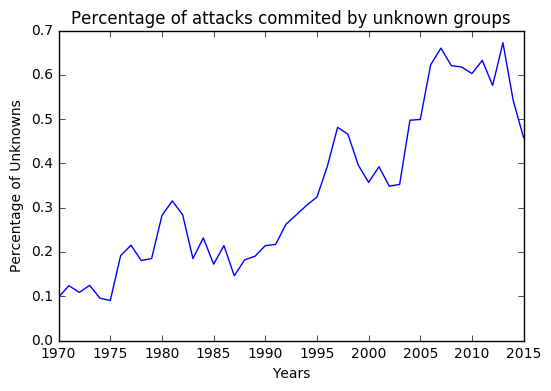

In [16]:
unknown_attacks_year = ter_filtered[ter_filtered['gname'] == 'Unknown'].groupby('iyear').size()
all_attacks = ter_filtered.groupby('iyear').size()

#plotting the results
(unknown_attacks_year/all_attacks).plot()
plt.title('Percentage of attacks commited by unknown groups')
plt.xlabel('Years')
plt.ylabel('Percentage of Unknowns')

We can see that as the years pass, the percentage of unknown attacks increases. It might be because the number of attacks are also on the rise.

Now, we want to explore the most concerning consequence of terrorism, that is, the number of people killed.

## Victims of Attacks

We will explore how many victims the terrorist groups have claimed in the attacks in our data set:

In [17]:
#some pre-processing, and then we compute the number of events and kills in our dataset across the years
ter_filtered['nkill'] = (ter_filtered['nkill'].fillna(value = 0)).astype(float)
ter_filtered.groupby('iyear').aggregate({'eventid':len, 'nkill':np.sum}).head(12)

#eventid column shows the number of events, while nkill shows the number of people killed in all those events

,eventid,nkill
iyear,,
1970,489,157.0
1971,323,114.0
1972,313,386.0
1973,313,266.0
1974,440,450.0
1975,586,412.0
1976,663,538.0
1977,925,354.0
1978,1097,1091.0


We plot it:

In [18]:
#Visualization made in Tableau

In [19]:


%%HTML

<div class='tableauPlaceholder' id='viz1488764758602' style='position: relative'><noscript><a href='#'><img alt='kills_attacks_dash ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismAnalytics&#47;kills_attacks_dash&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='TerrorismAnalytics&#47;kills_attacks_dash' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismAnalytics&#47;kills_attacks_dash&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488764758602');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='804px';vizElement.style.height='869px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>



From the graph, we can see that the as the number of attacks increases, the number of people killed increases too. There seems to be a direct relation between the number of people killed and the number of terrorist attacks. Let us explore this further, by calculating how many people die on average per attack:

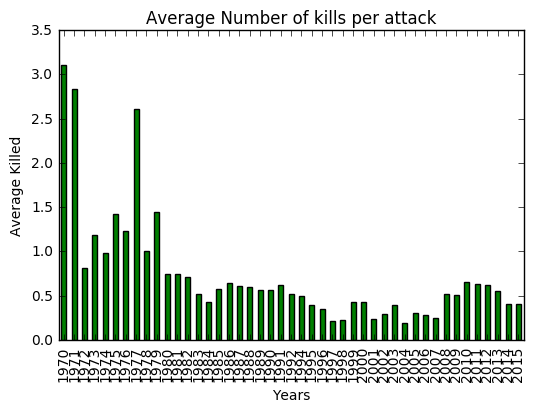

In [20]:
#calculating the average
attacks_kills = ter_filtered.groupby('iyear').aggregate({'eventid':len, 'nkill':np.sum})
attacks_kills['Average kill'] = round(attacks_kills['eventid']/attacks_kills['nkill'],2)

#plotting the results
attacks_kills['Average kill'].plot(kind = 'bar', color = 'green')
plt.title('Average Number of kills per attack')
plt.xlabel('Years')
plt.ylabel('Average Killed')

As we can see, the average number of peopled killed by a terrorist attack dropped to less than one person from 1978 onwards. This can be explained by a big number of failed attemps and groups targeting infrastructure and utilities. Now, Which are the most common attack types?

In [21]:
%%HTML

<div class='tableauPlaceholder' id='viz1488780295806' style='position: relative'><noscript><a href='#'><img alt='Dashboard 7 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard7&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='GTD_Final_Project&#47;Dashboard7' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard7&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488780295806');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='319px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

A massive number of attacks where committed using bombs and other types of explosions. Let's now look at what main attack types are employed by different groups:

In [22]:
# each division in the bar graph shows the name of the group and the number of attacks that the group commited

In [23]:

%%HTML

<div class='tableauPlaceholder' id='viz1488780442095' style='position: relative'><noscript><a href='#'><img alt='Dashboard 8 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard8&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='GTD_Final_Project&#47;Dashboard8' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard8&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488780442095');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='319px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Exploring the graph above, we can see that the groups with the highest numbers of attacks use bombing and explosions as their main resource. So, what weapons are used mostly? (The size of the bubble corresponds to the number of attacks where the weapon was employed)

In [24]:
%%HTML

<div class='tableauPlaceholder' id='viz1488781388700' style='position: relative'><noscript><a href='#'><img alt='Dashboard 13 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard13&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='GTD_Final_Project&#47;Dashboard13' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard13&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488781388700');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='869px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

We now know that this groups mostly employ explosives and firearms. Now, let us take a look at what weapon types are the most used by each group.

In [25]:
%%HTML

<div class='tableauPlaceholder' id='viz1488780991384' style='position: relative'><noscript><a href='#'><img alt='Dashboard 9 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard9&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='GTD_Final_Project&#47;Dashboard9' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard9&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488780991384');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='669px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

From the bar graph above, we can see that groups in the Middle East (Taliban, ISIL, Al-Qaida) employ a more diverse set of weapons than groups in other regions. In contrast, the largest group in South America (Shining Path), employs only one type of weapon.

So far, we have discussed and explored some global trends in terrorism. Next, we will follow the story of two terrorist groups from the South and Central American regions: Shining Path and Farabundo Marti National Liberation Front (FMLN). We will see how they emerged and declined, their common practices and the impact on their respective countries.

# The Shining Path (Sendero Luminoso) of Peru

Shining Path is a terrorist group located in region 3, corresponding to South America. So first, we are interested in seeing the attacks committed in region 3. Let us see the number of attacks through the years.

In [26]:
#ter_filtered[ter_filtered['region'] == '3'].groupby('iyear').size().plot( color = 'red')

In [27]:
%%HTML

<div class='tableauPlaceholder' id='viz1488779958334' style='position: relative'><noscript><a href='#'><img alt='Dashboard 6 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard6&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='GTD_Final_Project&#47;Dashboard6' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard6&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488779958334');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='869px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

It appears there is a strong activity between the second half of the 1970's and the first half of the 1990's, followed by a large decline. Lets see which groups in this region were more active:


The graph below shows the number of attacks for each group. The colors represent the number of people killed by each group (darker meaning more kills)

In [28]:
%%HTML

<div class='tableauPlaceholder' id='viz1488767130689' style='position: relative'><noscript><a href='#'><img alt='GroupsSouthAmerica_dash ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismAnalytics&#47;GroupsSouthAmerica_dash&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='TerrorismAnalytics&#47;GroupsSouthAmerica_dash' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismAnalytics&#47;GroupsSouthAmerica_dash&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488767130689');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='869px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

We can see that the deadliest group (most number of kills) and with the most number of attacks correspond to the Shining Path (Sendero Luminoso) of Peru.  Now, lets look at the number of attacks through the years for this particular group:

In [29]:
ter_filtered[ter_filtered['gname'] == 'Shining Path (SL)'].groupby('iyear').size().head()
#plt.title('Number of Terrorist Attacks in the Dataset through the years')
#plt.xlabel('Years')
#plt.ylabel('# of attacks')



iyear
1978      1
1979      1
1980     24
1981     85
1982    243
dtype: int64

In [30]:
%%HTML

<div class='tableauPlaceholder' id='viz1488772905780' style='position: relative'><noscript><a href='#'><img alt='Dashboard 3 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='GTD_Final_Project&#47;Dashboard3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488772905780');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='869px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

We want to know how this group spread through the territory in Peru, so lets map our events and see how they took place across the years (click on the link to go to animation):

In [31]:
%%HTML

<blockquote class="embedly-card"><h4><a href="https://joseedu.github.io/project1SP/">Shining Path Attacks (Animation)
</a></h4><p>null</p></blockquote>
<script async src="//cdn.embedly.com/widgets/platform.js" charset="UTF-8"></script>

From the animation, we can see that the regions along the cost of Peru are the ones with larger concentration of attacks, particularly in the Ayacucho Region. Lets look again at the number of attacks for this regions:

In [32]:
sp_attacks_states = ter_filtered[ter_filtered['gname'] == 'Shining Path (SL)'].groupby('provstate').size()
sp_attacks_states.sort_values(ascending = False).head(5)

provstate
Lima        1539
Ayacucho     823
Junin        399
Unknown      202
Ancash       147
dtype: int64

In [33]:
%%HTML
<div class='tableauPlaceholder' id='viz1488768088419' style='position: relative'><noscript><a href='#'><img alt='AttacksPeruRegion_dash ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismAnalytics&#47;AttacksPeruRegion_dash&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='TerrorismAnalytics&#47;AttacksPeruRegion_dash' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismAnalytics&#47;AttacksPeruRegion_dash&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488768088419');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='869px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

It makes sense that Lima, being the capital, was heavily attacked. It turns out that Ayacucho, the state with the larger number of kills, was selected as the base of operations for the Shining Path Group. 

* Interesting fact: If we look at the monthly attacks across all years, we can see that there appears to be more activity from the group during the 5th and 7th month. These months correspond to the months after elections take place in Peru:

In [34]:
%%HTML

<div class='tableauPlaceholder' id='viz1488767251582' style='position: relative'><noscript><a href='#'><img alt='Shining Path: Number of attacks and Victims by Month ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismAnalytics&#47;Monthly_Attacks&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='TerrorismAnalytics&#47;Monthly_Attacks' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismAnalytics&#47;Monthly_Attacks&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488767251582');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

If we look at the range of dates of the attacks, we can observe a peak in the late 80's, and then practically a drop to almost zero in the first years of the 90's. To be sure, let's find the years with major drops:

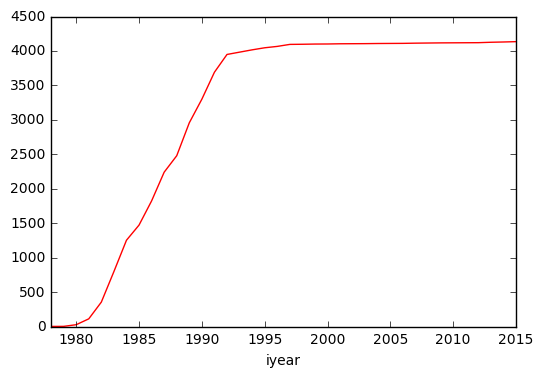

In [35]:
sp_attacks = ter_filtered[ter_filtered['gname'] == 'Shining Path (SL)'].groupby('iyear').size()
sp_attacks.cumsum().plot(color = 'red')

From the graph, we can see there are some interesting years where the difference between attacks was greater with previous years. Let us look at what caused the number of attacks to decrease drastically in 1992.

### What happened? To answer this question, we will look at wikipedia!

We will use information from the Years pages in Wikipedia (english and spanish) to see what major events happened in Peru in the years we found interesting changes in the data. We will make use of Wikipedias API and wptools to get the data we are looking for:

In [36]:
#We will use wptools to get the information for the year in wikipedia 

import wptools
import re
 
#the following function gets the wikipedia page of a year given as argument, and creates a dictionary
#with all the events listed in wikipedia for the given year page, where the key and value are structured as:
#'Month day': event

def wiki_search(year, language):
    wiki_year = wptools.page(year,lang = language).get()
 
    days1 = wiki_year.wikitext.split('\n* [[')
    days2 = wiki_year.wikitext.split('\n*[[')
    
    if len(days1) > len(days2):
        days = days1
    else:
        days = days2
    
    days = [re.sub(r'[^\w.]', ' ', day) for day in days]

    # Lets use a regular expression to match a date string
    # in the form of Month name followed by day number
    if language == 'en':
        regex = r"([a-zA-Z]+) (\d+)"
    else:
        regex = r"(\d+) ([de]+) ([a-zA-Z]+)"
    
    days_tuples = [((re.search(regex, day)).group(0), re.sub(regex, '', day)) if (re.search(regex, day)) is not None else ("","") for day in days]
    days_dic = {}
    for k,v in days_tuples:
        if k not in days_dic.keys():
            days_dic[k] = v
    return days_dic


Now, we will create a dictionary of dates for the year of interest, and look if we can find anything related to the group:


In [37]:
#CREATE DICTIONARY

year = '1992'

days_dic = {}
days_dic = wiki_search(year, 'en')

1992 (en)
{
  lang: en
  title: 1992
}
en.wikipedia.org (query) 1992
en.wikipedia.org (parse) 34669
www.wikidata.org (wikidata) Q2060
www.wikidata.org (claims) Q6938740|Q577
en.wikipedia.org (imageinfo) File:1992 Winter Olympics logo.svg
1992 (en)
{
  cache: <dict(5)> {claims, imageinfo, parse, query, wikidata}
  claims: <dict(2)> {Q577, Q6938740}
  description: year
  extext: <str(365)> **1992 (MCMXCII)** was a leap year starting on ...
  extract: <str(402)> <p><b>1992 (MCMXCII)</b> was a leap year start...
  images: <list(2)>
  label: 1992
  lang: en
  links: https://commons.wikimedia.org/wiki/Category:1992
  modified: <dict(2)> {page, wikidata}
  pageid: 34669
  parsetree: <str(97581)> <root><template><title>Use mdy dates</titl...
  props: <dict(3)> {P31, P585, P910}
  random: Government Girls P.G. College
  title: 1992
  url: https://en.wikipedia.org/wiki/1992
  url_raw: https://en.wikipedia.org/wiki/1992?action=raw
  what: year
  wikibase: Q2060
  wikidata: <dict(3)> {category, da

In [38]:
#SHOW DICTIONARY

days_dic;

We are going to use key words in our dataset for the year of interest to help find entries in our dictionary. The keywords include information of the attack, such as country, cities, group, etc.

In [39]:
#We create the keywords using filters and unique words

sp_df = ter_filtered[ter_filtered['gname'] == 'Shining Path (SL)']
sp_df = sp_df[sp_df['iyear'] == int(year)]
key_words = list(sp_df['provstate'].unique()) + list(sp_df['country_txt'].unique()) + (list(sp_df['gname'].unique())) + (list(sp_df['city'].unique()))
key_words.append('Perú')

In [40]:
key_words = [x for x in key_words if str(x) != 'nan']
key_words

['Ancash',
 'Lima',
 'Puno',
 'Unknown',
 'Huancavelica',
 'Junin',
 'Cusco',
 'Ayacucho',
 'Huanuco',
 'Piura',
 'La Libertad',
 'Apurimac',
 'Amazonas',
 'Callao',
 'Pasco',
 'Arequipa',
 'La Paz',
 'Tacna',
 'Peru',
 'Bolivia',
 'Shining Path (SL)',
 'Huari',
 'Lima',
 'Macari',
 'El Muyo-Matara',
 'Castrovirreyna district',
 'Concepcion district',
 'Mollepata',
 'Huaral',
 'Puquio',
 'Huancayo',
 'Dos de Mayo district',
 'Huancabamba district',
 'Cangallo',
 'Tutumbaru',
 'Unknown',
 'Angasmarca',
 'Tornameza',
 'Huancayo district',
 'Saraya',
 'San Carlos',
 'Andajes',
 'Ayacucho',
 'Masamari',
 'Melgar district',
 'Palmapampa',
 'LIma',
 'Porculla',
 'Callao',
 'Puente Piedra',
 'San Francisco de Mosca',
 'Paucartambo',
 'Ulcumayo',
 'Quilcapata',
 'Quiparacra',
 'Las Vegas',
 'Puerto Acosta',
 'Huancaraylla',
 'Circamarca',
 'Llusita',
 'Huacho',
 'Huamanquiquia',
 'La Florida',
 'Acobamba',
 'Pichihuillca',
 'Santa Ana',
 'Puente Capelo',
 'Ayacucho district',
 'Huayllapata',
 

In [41]:
#This function looks for the word in all our dictionaty entries

def search(myDict, lookup):
    a=[]
    for key, value in myDict.items():
        if lookup in value:
            a.append(key)
            print(key, '-', value, '\n')
        a=list(set(a))
    return a

Finally, lets look for the entries in our dictionary that are related to the attacks we are researching:

In [42]:
#Search and print all entries related to the key words for the given year
for word in key_words:
    search(days_dic, word)

November 13 -      The   government of Peru   announces it has arrested a small group of army officers who were plotting the assassination of President   Alberto Fujimori  .   A report by the   World Meteorological Organization   reports an unprecedented level of   ozone depletion   in both the Arctic and Antarctic.     Boxing Boxer     Riddick Bowe   defeats   Evander Holyfield   to become   Undisputed champion undisputed     heavyweight   champion. 

September 12 -                Dr.   Mae Jemison   becomes the first   African American   woman to travel into space  aboard the Space Shuttle     Space Shuttle Endeavour Endeavour    .   In   Peru    police arrest   Abimael Guzmán    the leader of the   Shining Path   guerilla movement  who had evaded capture  years. 

October 7 -     ndash  In   Peru      Shining Path   leader   Abimael Guzmán   is convicted of treason and sentenced to life in prison. 

January 1 -      The      is finally  years after its introduction in .     Boutros 

We can see that the leader of the the Shining Path, Abimael Guzman was arrested in September 12 and convicted to life in prision in October 7 of the year of 1992.

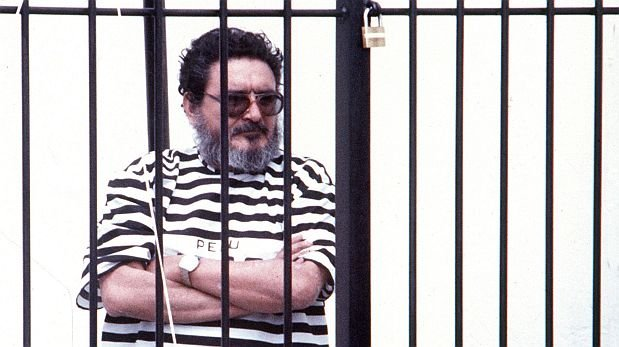

In [43]:
from IPython.display import Image
Image(filename='abimael.jpg') 

Shining Path, believed in establishing a communist dictatorship in Peru and around the world through violence. This caused fear among the people and they didn’t gain much support. They also closed off local markets as they believed in eradicating all forms of capitalism. This didn’t go well with the working class and they helped the government in capturing the leaders of the insurgent group.

# Farabundo Marti National Liberation Front (FMLN)

The FMLN, one of the main participants in the Salvadoran Civil War, was formed on October 10, 1980, taking the name of Farabundo Martí, the peasant leader during the 1932 Salvadorean peasant massacre. Throughout the 1980s its members initiated and engaged in hard-fought battles with Salvadoran government troops. Let us take a look at the attacks conducted by FMLN from 1978 to 1994.

In [44]:
%%HTML 

<a class="embedly-card" href="https://joseedu.github.io/elSalvadorMap/">FMNL Story</a>
<script async src="//cdn.embedly.com/widgets/platform.js" charset="UTF-8"></script>

Which groups were targeted and what weapons were used?

In [45]:
%%HTML

<div class='tableauPlaceholder' id='viz1488743106261' style='position: relative'><noscript><a href='#'><img alt='Attacks by target type and weapon used ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Farabundo&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='GTD_Final_Project&#47;Farabundo' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Farabundo&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488743106261');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


Which city took the most hits? What other countries did FMLN spread to?

Farabundo Marti Liberation Front (FMLN) guerillas launched a major offensive in San Salvador, the capital city, jeopardizing civilians and targeting foreign personnel to gain international attention.

In [46]:
%%HTML

<div class='tableauPlaceholder' id='viz1488773698493' style='position: relative'><noscript><a href='#'><img alt='Dashboard 5 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard5&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='GTD_Final_Project&#47;Dashboard5' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard5&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488773698493');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='869px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


Farabundo frequently targeted the utilities. They regularly damaged or disrupted the country's transportation, communications, and energy systems to erode the government's popularity. The attacks spiked mainly during election years. The FMLN conducted other acts of domestic terrorism which resulted in the death of a number of civilians.

In [47]:
%%HTML

<div class='tableauPlaceholder' id='viz1488747821372' style='position: relative'><noscript><a href='#'><img alt='Farabundo # of Attacks by year ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;F-ofattacksperyear&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='GTD_Final_Project&#47;F-ofattacksperyear' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;F-ofattacksperyear&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488747821372');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


Let us take a look at the lifespan of FMLN

In [48]:
%%HTML

<div class='tableauPlaceholder' id='viz1488773438058' style='position: relative'><noscript><a href='#'><img alt='Dashboard 4 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='GTD_Final_Project&#47;Dashboard4' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;GT&#47;GTD_Final_Project&#47;Dashboard4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1488773438058');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='869px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

So, what happened in 1992? Let us search Wikipedia.

In [49]:
year = '1992'

days_dic = {}
days_dic = wiki_search(year, 'en')

1992 (en)
{
  lang: en
  title: 1992
}
en.wikipedia.org (query) 1992
en.wikipedia.org (parse) 34669
www.wikidata.org (wikidata) Q2060
www.wikidata.org (claims) Q6938740|Q577
en.wikipedia.org (imageinfo) File:1992 Winter Olympics logo.svg
1992 (en)
{
  cache: <dict(5)> {claims, imageinfo, parse, query, wikidata}
  claims: <dict(2)> {Q577, Q6938740}
  description: year
  extext: <str(365)> **1992 (MCMXCII)** was a leap year starting on ...
  extract: <str(402)> <p><b>1992 (MCMXCII)</b> was a leap year start...
  images: <list(2)>
  label: 1992
  lang: en
  links: https://commons.wikimedia.org/wiki/Category:1992
  modified: <dict(2)> {page, wikidata}
  pageid: 34669
  parsetree: <str(97581)> <root><template><title>Use mdy dates</titl...
  props: <dict(3)> {P31, P585, P910}
  random: VirtualDJ Radio
  title: 1992
  url: https://en.wikipedia.org/wiki/1992
  url_raw: https://en.wikipedia.org/wiki/1992?action=raw
  what: year
  wikibase: Q2060
  wikidata: <dict(3)> {category, datetime, instan

In [50]:
#We create the keywords using filters and unique words
sp_df = ter_filtered[ter_filtered['gname'] == 'Farabundo Marti National Liberation Front (FMLN)']
sp_df = sp_df[sp_df['iyear'] == int(year)]
key_words = list(sp_df['provstate'].unique()) + list(sp_df['country_txt'].unique()) + (list(sp_df['gname'].unique())) + (list(sp_df['city'].unique()))
key_words = [x for x in key_words if str(x) != 'nan']
key_words

['El Salvador',
 'Farabundo Marti National Liberation Front (FMLN)',
 'San Salvador',
 'Anamoros']

In [51]:

#Search and print all entries related to the key words for the given year
for word in key_words:
    search(days_dic, word)


January 24 -      In   El Salvador    an army colonel and a lieutenant of the   Atlacatl Battalion   are each sentenced  years in prison for   Murder of UCA scholars  murder of six Jesuit priests and their housekeepers  .   China and   Israel   establish diplomatic relations. 

January 16 -        El Salvador   officials and rebel leaders sign the   Chapultepec Peace Accords   in Mexico City ending  year   Salvadoran Civil War   that claimed at  000 lives. 



So, we see that a peace treaty was signed and the terrorist party became legal in El Salvador in 1992. This explains the drop in the number of attacks around 1992. So, now Salvadoreans can vote FMLN to power. In fact, in 2009, FMLN won the presidential elections.

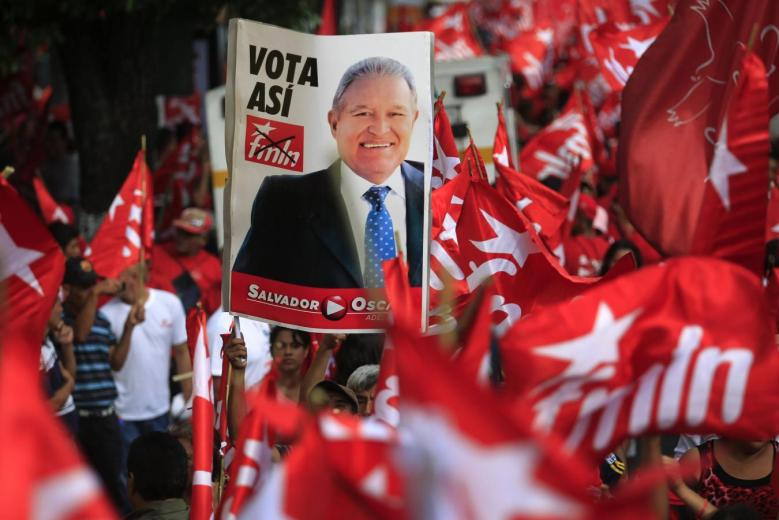

In [52]:
Image(filename='fmln.jpg') 

## Some Final Comments...

The stories shows us different ways in which governments can deal with terrorist groups. Both were Communist inspired terrorist groups. Both killed a lot of people in their countries. But one became a legal party and the other ceased to exist. Farabundo enjoyed support from the people, so the government could not defeat them with military power and US support. So, they negotiated a peace treaty and FMLN became a legal party. They won the presidential elections in March 2009. Thus, we see that data on who terrorists are and what motivates them helps intelligence agencies combat terrorist organizations across the world.